In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Load data
nodes_df = pd.read_csv("graph_nodes.csv")
edges_df = pd.read_csv("graph_edges.csv")

# Create graph
G = nx.Graph()
for _, row in nodes_df.iterrows():
    G.add_node(row['name'], gender=row['gender'])

for _, row in edges_df.iterrows():
    G.add_edge(row['Source'], row['Target'], weight=row['Weight'])

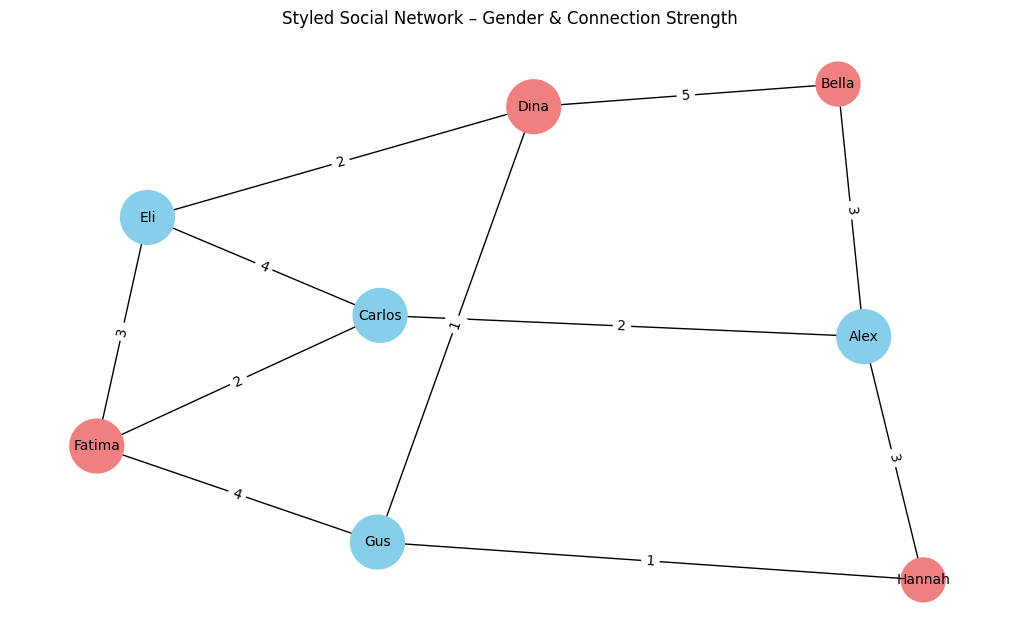

In [2]:
# Layout
pos = nx.spring_layout(G, seed=42)

# Style: color by gender
gender_colors = {'Male': 'skyblue', 'Female': 'lightcoral'}
node_colors = [gender_colors[G.nodes[node]['gender']] for node in G.nodes]

# Size by degree
node_sizes = [G.degree(node)*500 for node in G.nodes]

# Draw
plt.figure(figsize=(10,6))
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes, font_size=10)

# Edge weights
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Styled Social Network – Gender & Connection Strength")
plt.show()

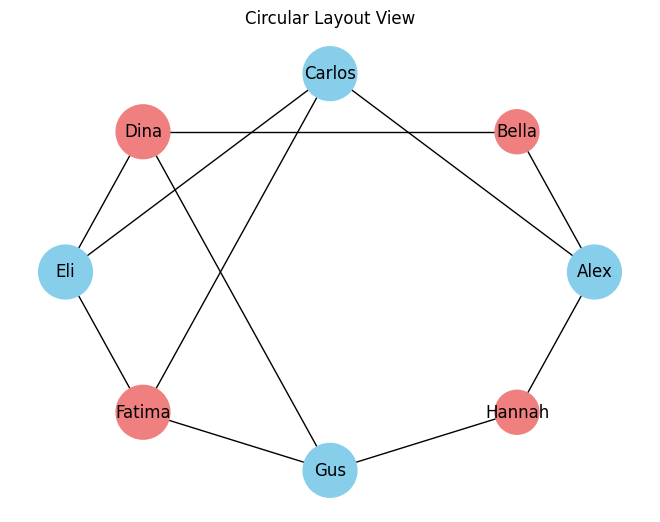

In [3]:
# Change layout to circular
pos_circ = nx.circular_layout(G)
nx.draw(G, pos_circ, with_labels=True, node_color=node_colors, node_size=node_sizes)
plt.title("Circular Layout View")
plt.show()

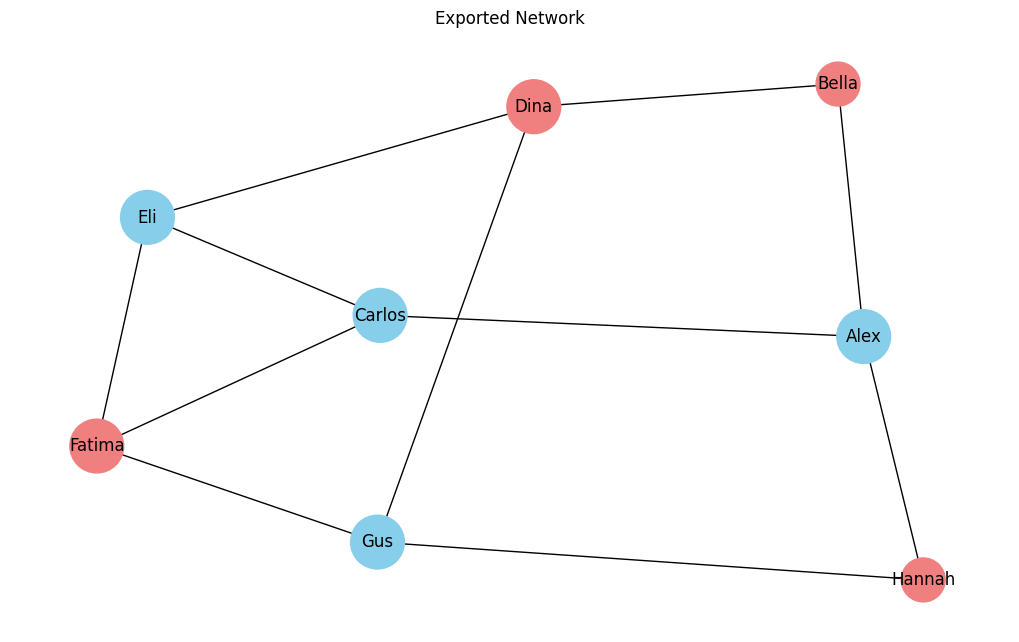

In [4]:
plt.figure(figsize=(10,6))
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=node_sizes)
plt.title("Exported Network")
plt.savefig("network_graph_week5.png")
plt.show()